In [1]:
using SavitzkyGolay
import Pkg
Pkg.add("StatsPlots")

   Resolving package versions...
   Installed libaom_jll ─ v3.12.1+0
    Updating `C:\Users\Lenovo\Documents\GitHub\Dark_Matter_Magnetized_Disc_Mirror_Axion_Dielectric_Haloscope_Experiment\Project.toml`
  [f3b207a7] + StatsPlots v0.15.7
    Updating `C:\Users\Lenovo\Documents\GitHub\Dark_Matter_Magnetized_Disc_Mirror_Axion_Dielectric_Haloscope_Experiment\Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [7d9fca2a] + Arpack v0.5.4
  [13072b0f] + AxisAlgorithms v1.1.0
  [d1d4a3ce] + BitFlags v0.1.9
  [d360d2e6] + ChainRulesCore v1.25.2
  [aaaa29a8] + Clustering v0.15.8
  [944b1d66] + CodecZlib v0.7.8
  [35d6a980] + ColorSchemes v3.30.0
  [3da002f7] + ColorTypes v0.12.1
  [c3611d14] + ColorVectorSpace v0.11.0
  [5ae59095] + Colors v0.13.1
  [34da2185] + Compat v4.17.0
  [f0e56b4a] + ConcurrentUtilities v2.5.0
  [d38c429a] + Contour v0.6.3
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + Dat

In [7]:
import Pkg
Pkg.add("DSP")

   Resolving package versions...
   Installed Polynomials ─ v4.1.0
   Installed Bessels ───── v0.2.8
   Installed DSP ───────── v0.8.4
    Updating `C:\Users\Lenovo\Desktop\MADMAX\Project.toml`
  [717857b8] + DSP v0.8.4
    Updating `C:\Users\Lenovo\Desktop\MADMAX\Manifest.toml`
  [0e736298] + Bessels v0.2.8
  [187b0558] + ConstructionBase v1.6.0
  [717857b8] + DSP v0.8.4
  [c8e1da08] + IterTools v1.10.0
  [f27b6e38] + Polynomials v4.1.0
  [efcf1570] + Setfield v1.1.2
Precompiling project...
   1348.6 ms  ✓ Unitful → ConstructionBaseUnitfulExt
   1219.3 ms  ✓ ConstructionBase → ConstructionBaseStaticArraysExt
   2324.2 ms  ✓ Bessels
  17780.5 ms  ✓ Polynomials
   1395.4 ms  ✓ Polynomials → PolynomialsChainRulesCoreExt
   1443.0 ms  ✓ Polynomials → PolynomialsFFTWExt
   3266.5 ms  ✓ DSP
   1506.8 ms  ✓ DSP → OffsetArraysExt
  8 dependencies successfully precompiled in 27 seconds. 279 already precompiled.


In [ ]:
import Pkg
Pkg.add("FFTW")
Pkg.add("Colors")
Pkg.add("ColorSchemes")


   Resolving package versions...
    Updating `C:\Users\Lenovo\Desktop\MADMAX\Project.toml`
  [7a1cc6ca] + FFTW v1.9.0
  No Changes to `C:\Users\Lenovo\Desktop\MADMAX\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\Lenovo\Desktop\MADMAX\Project.toml`
  [5ae59095] + Colors v0.13.1
  No Changes to `C:\Users\Lenovo\Desktop\MADMAX\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\Lenovo\Desktop\MADMAX\Project.toml`
  [35d6a980] + ColorSchemes v3.30.0
  No Changes to `C:\Users\Lenovo\Desktop\MADMAX\Manifest.toml`


In [11]:
Pkg.add("PlotlyBase")

   Resolving package versions...
   Installed Parameters ─ v0.12.3
   Installed UnPack ───── v1.0.2
   Installed PlotlyBase ─ v0.8.21
    Updating `C:\Users\Lenovo\Desktop\MADMAX\Project.toml`
  [a03496cd] + PlotlyBase v0.8.21
    Updating `C:\Users\Lenovo\Desktop\MADMAX\Manifest.toml`
  [d96e819e] + Parameters v0.12.3
  [a03496cd] + PlotlyBase v0.8.21
  [3a884ed6] + UnPack v1.0.2
Precompiling project...
    555.6 ms  ✓ UnPack
    644.0 ms  ✓ Parameters
   1871.3 ms  ✓ JLD2 → UnPackExt
   4519.6 ms  ✓ PlotlyBase
   2895.3 ms  ✓ PlotlyBase → DistributionsExt
   4200.0 ms  ✓ PlotlyBase → DataFramesExt
  6 dependencies successfully precompiled in 11 seconds. 287 already precompiled.


In [2]:
println("Hello")

Hello


In [ ]:

using LinearAlgebra

# -----------------------------
# PARAMETERS
# -----------------------------
n_tests = 1000         # reduced for fast test, increase for final production
nbins = 10_000
epsp = 1e-7
test_amplitudes = [15]
test_widths = [4]
sg_window_lengths = [3, 5, 7, 9, 11, 13]
sg_poly_orders = [2, 3, 4]
rebin_steps = [1, 2, 5, 10]

# Squares Statistic settings
Ns_dict = Dict{Int, Vector{Float64}}()
for step in rebin_steps
    n_bins_rebinned = Int(nbins / step)
    Ns_dict[step] = [50.0, n_bins_rebinned / 50]
end

# -----------------------------
# SAVITZKY-GOLAY FUNCTIONS
# -----------------------------
function savgol_coeffs(window_length, poly_order)
    if window_length % 2 != 1
        error("Window length must be odd")
    end
    half_window = div(window_length - 1, 2)
    A = zeros(window_length, poly_order + 1)
    for i in 1:window_length
        x = i - half_window - 1
        for j in 1:(poly_order + 1)
            A[i, j] = x^(j - 1)
        end
    end
    return pinv(A)[1, :]
end

function apply_savgol_filter(data, window_length, poly_order)
    if window_length >= length(data)
        return copy(data)
    end
    coeffs = savgol_coeffs(window_length, poly_order)
    half_window = div(window_length - 1, 2)
    filtered = zeros(length(data))
    for i in 1:length(data)
        start_idx = max(1, i - half_window)
        end_idx = min(length(data), i + half_window)
        if i <= half_window || i > length(data) - half_window
            filtered[i] = mean(data[start_idx:end_idx])
        else
            filtered[i] = sum(coeffs .* data[start_idx:end_idx])
        end
    end
    return filtered
end

# -----------------------------
# SIGNAL GENERATOR
# -----------------------------
function signal_integral(x1, x2, A, w, ::Symbol)
    ds = Normal(0.0, w)
    A * (cdf(ds, x2) - cdf(ds, x1))
end

# -----------------------------
# MAIN SCAN
# -----------------------------
results = Dict()
Random.seed!(42)
println("Starting SG Filter Width Scan with rebinning...")

t_start = time()
for width in test_widths
    results[width] = Dict()
    for amplitude in test_amplitudes
        key = "A$(amplitude)"
        results[width][key] = Dict()

        for step in rebin_steps
            println("\nWidth = $width, Amplitude = $amplitude, Rebin step = $step")
            nbins_rebinned = Int(nbins / step)
            pv_original = zeros(n_tests)
            Ns_current = Ns_dict[step]

            for test in 1:n_tests
                Run = zeros(nbins)
                if amplitude == 0
                    Run .= randn(nbins)
                else
                    for bin in 1:nbins
                        x1 = (bin - 1) - nbins / 2
                        x2 = bin - nbins / 2
                        bin_integral = signal_integral(x1, x2, amplitude, width, :gaussian)
                        d = Normal(bin_integral, 1.0)
                        Run[bin] = rand(d)
                    end
                end

                # Rebin
                if step > 1
                    Run_rebinned = [sum(@view Run[(i-1)*step+1:i*step]) for i in 1:nbins_rebinned]
                else
                    Run_rebinned = Run
                end

                Squares = t_obs(Run_rebinned, 0.0, step)
                pv_original[test] = squares_pvalue_approx(Squares[1], Ns_current, epsp)

                if test % 200 == 0
                    println("  Completed $test / $n_tests (original)")
                end
            end

            results[width][key]["original_rebin_$step"] = pv_original
            println("  Original complete: Mean p = $(round(mean(pv_original), digits=4)), Power = $(round(mean(pv_original .< 0.05), digits=4))")

            # -------------------
            # SG Filter
            # -------------------
            for wl in sg_window_lengths
                for po in sg_poly_orders
                    println("  Applying SG filter wl = $wl, po = $po, step = $step")
                    pv_filtered = zeros(n_tests)

                    for test in 1:n_tests
                        Run = zeros(nbins)
                        if amplitude == 0
                            Run .= randn(nbins)
                        else
                            for bin in 1:nbins
                                x1 = (bin - 1) - nbins / 2
                                x2 = bin - nbins / 2
                                bin_integral = signal_integral(x1, x2, amplitude, width, :gaussian)
                                d = Normal(bin_integral, 1.0)
                                Run[bin] = rand(d)
                            end
                        end

                        Run_filtered = apply_savgol_filter(Run, wl, po)

                        # Rebin filtered
                        if step > 1
                            Run_rebinned = [sum(@view Run_filtered[(i-1)*step+1:i*step]) for i in 1:nbins_rebinned]
                        else
                            Run_rebinned = Run_filtered
                        end

                        Squares = t_obs(Run_rebinned, 0.0, step)
                        pv_filtered[test] = squares_pvalue_approx(Squares[1], Ns_current, epsp)

                        if test % 200 == 0
                            println("    Completed $test / $n_tests (SG wl = $wl, po = $po)")
                        end
                    end
                    results[width][key]["sg_$(wl)_$(po)_rebin_$step"] = pv_filtered
                    println("   SG wl = $wl, po = $po, step = $step complete: Mean p = $(round(mean(pv_filtered), digits=4)), Power = $(round(mean(pv_filtered .< 0.05), digits=4))")
                end
            end
        end
        println("\n✅ Width = $width, A = $amplitude fully completed.")
    end
end

println("\nAll simulations completed in $(round((time() - t_start)/60, digits=2)) minutes.")
println("Generating optimal summary DataFrame...")

# -----------------------------
# GENERATE SUMMARY DATAFRAME
# -----------------------------
optimal_df = DataFrame(width=Float64[], amplitude=Int[], step=Int[], best_wl=Int[], best_po=Int[], best_mean_p=Float64[], best_power=Float64[])

for width in test_widths
    for amplitude in test_amplitudes
        key = "A$(amplitude)"
        for step in rebin_steps
            best_mean_p = mean(results[width][key]["original_rebin_$step"])
            best_power = mean(results[width][key]["original_rebin_$step"] .< 0.05)
            best_wl = 0
            best_po = 0

            for wl in sg_window_lengths
                for po in sg_poly_orders
                    pvs = results[width][key]["sg_$(wl)_$(po)_rebin_$step"]
                    mp = mean(pvs)
                    pow = mean(pvs .< 0.05)
                    if mp < best_mean_p
                        best_mean_p = mp
                        best_power = pow
                        best_wl = wl
                        best_po = po
                    end
                end
            end

            push!(optimal_df, (width, amplitude, step, best_wl, best_po, best_mean_p, best_power))
        end
    end
end

display(optimal_df)

println("\n✅ Optimal SG filter with rebinning analysis completed.")

# -----------------------------
# (Optional) Save outputs
# -----------------------------
# using CSV
# CSV.write("optimal_sg_summary.csv", optimal_df)
# using Serialization
# serialize("sg_results.jls", results)



In [ ]:
using Plots, StatsPlots, Statistics, Distributions, LinearAlgebra, QuadGK
using DSP, FFTW, Colors, ColorSchemes
plotly()

# Savitzky-Golay filter implementation
function savitzky_golay_coeffs(window_length, poly_order)
    """
    Calculate Savitzky-Golay filter coefficients
    """
    if window_length % 2 == 0
        error("window_length must be odd")
    end
    
    half_window = (window_length - 1) ÷ 2
    
    # Create the matrix A for least squares fitting
    A = zeros(window_length, poly_order + 1)
    for i in 1:window_length
        x = i - half_window - 1
        for j in 1:(poly_order + 1)
            A[i, j] = x^(j-1)
        end
    end
    
    # Calculate coefficients (we want the 0th order coefficient)
    coeffs = (A' * A) \ A'
    return coeffs[1, :]  # Return coefficients for 0th derivative
end

function savitzky_golay_filter(data, window_length=11, poly_order=3)
    """
    Apply Savitzky-Golay filter to data
    """
    coeffs = savitzky_golay_coeffs(window_length, poly_order)
    filtered = copy(data)
    half_window = (window_length - 1) ÷ 2
    
    for i in (half_window + 1):(length(data) - half_window)
        filtered[i] = sum(coeffs .* data[(i - half_window):(i + half_window)])
    end
    
    return filtered
end

# Your existing signal functions (enhanced)
function maxwell_pdf(v, w)
    v < 0 && return 0.0
    return (v^2 / w^3) * exp(-v^2 / (2 * w^2))
end

function signal_integral(x1, x2, A, w, signal_type::Symbol)
    if signal_type == :gaussian
        ds = Normal(0.0, w)
        return A * (cdf(ds, x2) - cdf(ds, x1))
    elseif signal_type == :lorentzian
        return A * (1 / π) * (atan(x2 / (0.5 * w)) - atan(x1 / (0.5 * w)))
    elseif signal_type == :maxwell
        val, _ = quadgk(v -> maxwell_pdf(v, w), max(0.0, x1), max(0.0, x2))
        return A * val
    else
        error("Unknown signal type: $signal_type")
    end
end

# Enhanced analysis with Savitzky-Golay filtering
function comprehensive_analysis()
    # Parameters
    nbins = 10000
    n_tests = 200  # Reduced for faster execution
    amplitudes = [0, 4, 8, 12, 16, 20]
    widths = [2, 4, 6, 8, 10, 12]
    signal_types = [:gaussian, :lorentzian, :maxwell]
    
    # Storage for results
    results = Dict()
    
    println("🔬 Running comprehensive signal analysis with Savitzky-Golay filtering...")
    
    for signal_type in signal_types
        results[signal_type] = Dict()
        
        for (i, A) in enumerate(amplitudes)
            for (j, w) in enumerate(widths)
                print("Processing $signal_type: A=$A, w=$w... ")
                
                # Generate multiple runs and collect p-values
                pvalues_raw = Float64[]
                pvalues_filtered = Float64[]
                sample_data_raw = nothing
                sample_data_filtered = nothing
                
                for test in 1:n_tests
                    # Generate synthetic data
                    Run1 = zeros(nbins)
                    for bin in 1:nbins
                        x1 = (bin - 1) - nbins / 2
                        x2 = bin - nbins / 2
                        bin_integral = signal_integral(x1, x2, A, w, signal_type)
                        d = Normal(bin_integral, 1.0)
                        Run1[bin] = rand(d)
                    end
                    
                    # Apply Savitzky-Golay filter
                    Run1_filtered = savitzky_golay_filter(Run1, 51, 3)
                    
                    # Store sample for visualization (first test only)
                    if test == 1
                        sample_data_raw = copy(Run1)
                        sample_data_filtered = copy(Run1_filtered)
                    end
                    
                    # Calculate test statistics (simplified for demo)
                    # Using variance as a simple test statistic
                    stat_raw = var(Run1)
                    stat_filtered = var(Run1_filtered)
                    
                    # Convert to p-values (simplified simulation)
                    push!(pvalues_raw, 1.0 - cdf(Chisq(1), stat_raw))
                    push!(pvalues_filtered, 1.0 - cdf(Chisq(1), stat_filtered))
                end
                
                results[signal_type][(A, w)] = (
                    pvalues_raw = pvalues_raw,
                    pvalues_filtered = pvalues_filtered,
                    sample_raw = sample_data_raw,
                    sample_filtered = sample_data_filtered
                )
                
                println("✓ Complete")
            end
        end
    end
    
    return results
end

# FIXED: Advanced visualization functions
function create_signal_comparison_plot(results)
    """
    Create a comprehensive comparison of raw vs filtered signals
    """
    signal_types = [:gaussian, :lorentzian, :maxwell]
    colors_raw = [:red, :blue, :green]
    colors_filt = [:orange, :purple, :brown]
    
    # Create individual plots
    plots_array = []
    
    for (idx, signal_type) in enumerate(signal_types)
        # Select a representative case (A=12, w=6)
        key = (12, 6)
        if haskey(results[signal_type], key)
            data = results[signal_type][key]
            
            # Subsample for visualization (every 50th point for speed)
            step = 50
            indices = 1:step:length(data.sample_raw)
            x_axis = indices
            
            # Create individual plot
            p = plot(x_axis, data.sample_raw[indices], 
                    label="Raw", color=colors_raw[idx],
                    alpha=0.7, linewidth=1.5,
                    title="$(uppercase(string(signal_type))) Signal")
            
            plot!(p, x_axis, data.sample_filtered[indices],
                  label="SG Filtered", color=colors_filt[idx],
                  linewidth=2, xlabel="Bin Index", ylabel="Signal Value")
            
            push!(plots_array, p)
        end
    end
    
    # Combine plots using proper layout
    return plot(plots_array..., layout=(1, 3), size=(1500, 400),
                plot_title="Signal Comparison: Raw vs Savitzky-Golay Filtered")
end

function create_pvalue_distribution_analysis(results)
    """
    Create sophisticated p-value distribution analysis
    """
    signal_types = [:gaussian, :lorentzian, :maxwell]
    plots_array = []
    
    for (idx, signal_type) in enumerate(signal_types)
        # Collect all p-values for this signal type
        all_pvals_raw = Float64[]
        all_pvals_filt = Float64[]
        
        for (key, data) in results[signal_type]
            append!(all_pvals_raw, data.pvalues_raw)
            append!(all_pvals_filt, data.pvalues_filtered)
        end
        
        # Create histogram comparison
        p = histogram(all_pvals_raw, 
                     alpha=0.6, bins=30, normalize=:pdf,
                     label="Raw", color=:red,
                     title="$(uppercase(string(signal_type))) P-values")
        histogram!(p, all_pvals_filt, 
                  alpha=0.6, bins=30, normalize=:pdf,
                  label="SG Filtered", color=:blue,
                  xlabel="P-value", ylabel="Density")
        
        push!(plots_array, p)
    end
    
    return plot(plots_array..., layout=(1, 3), size=(1500, 400),
                plot_title="P-value Distribution Analysis")
end

function create_sensitivity_heatmap(results)
    """
    Create heatmap showing sensitivity analysis
    """
    amplitudes = [0, 4, 8, 12, 16, 20]
    widths = [2, 4, 6, 8, 10, 12]
    
    # Calculate improvement metrics
    improvement_matrix = zeros(length(amplitudes), length(widths))
    
    for signal_type in [:gaussian, :lorentzian, :maxwell]
        temp_matrix = zeros(length(amplitudes), length(widths))
        
        for (i, A) in enumerate(amplitudes)
            for (j, w) in enumerate(widths)
                key = (A, w)
                if haskey(results[signal_type], key)
                    data = results[signal_type][key]
                    
                    # Calculate improvement metric
                    # (e.g., reduction in variance of p-values)
                    var_raw = var(data.pvalues_raw)
                    var_filt = var(data.pvalues_filtered)
                    
                    improvement = (var_raw - var_filt) / var_raw * 100
                    temp_matrix[i, j] = improvement
                end
            end
        end
        
        improvement_matrix += temp_matrix / 3  # Average across signal types
    end
    
    return heatmap(widths, amplitudes, improvement_matrix,
                   title="Savitzky-Golay Filter Improvement (%)\nVariance Reduction in P-values",
                   xlabel="Width Parameter", ylabel="Amplitude Parameter",
                   color=:viridis, size=(800, 600))
end

function create_spectral_analysis_plot(results)
    """
    Create frequency domain analysis using FFTW
    """
    signal_types = [:gaussian, :lorentzian, :maxwell]
    plots_array = []
    
    for (idx, signal_type) in enumerate(signal_types)
        # Get sample data
        key = (12, 6)
        if haskey(results[signal_type], key)
            data = results[signal_type][key]
            
            # Use subset for faster FFT
            n_points = min(2048, length(data.sample_raw))
            sample_raw = data.sample_raw[1:n_points]
            sample_filt = data.sample_filtered[1:n_points]
            
            # Compute FFT using FFTW
            fft_raw = abs.(fft(sample_raw))[1:n_points÷2]
            fft_filt = abs.(fft(sample_filt))[1:n_points÷2]
            
            freqs = (0:length(fft_raw)-1) ./ n_points
            
            # Create individual plot
            p = plot(freqs[2:end], fft_raw[2:end],
                    label="Raw", color=:red, alpha=0.7,
                    title="$(uppercase(string(signal_type)))",
                    xlabel="Frequency", ylabel="Magnitude",
                    yscale=:log10)
            plot!(p, freqs[2:end], fft_filt[2:end],
                  label="SG Filtered", color=:blue, linewidth=2)
            
            push!(plots_array, p)
        end
    end
    
    return plot(plots_array..., layout=(1, 3), size=(1500, 400),
                plot_title="Spectral Analysis: Effect of Savitzky-Golay Filtering")
end

# Enhanced execution with error handling
function run_complete_analysis()
    println(" Starting comprehensive Savitzky-Golay analysis...")
    println("This will generate publication-quality visualizations!")
    
    try
        # Run the analysis
        println(" Running signal analysis...")
        results = comprehensive_analysis()
        
        println("\n Creating visualizations...")
        
        # Create plots with error handling
        plots_created = []
        
        try
            plot1 = create_signal_comparison_plot(results)
            push!(plots_created, ("Signal Comparison", plot1))
            println(" Signal comparison plot created")
        catch e
            println("  Signal comparison plot failed: $e")
        end
        
        try
            plot2 = create_pvalue_distribution_analysis(results)
            push!(plots_created, ("P-value Analysis", plot2))
            println(" P-value distribution plot created")
        catch e
            println("  P-value analysis plot failed: $e")
        end
        
        try
            plot3 = create_sensitivity_heatmap(results)
            push!(plots_created, ("Sensitivity Heatmap", plot3))
            println(" Sensitivity heatmap created")
        catch e
            println(" Sensitivity heatmap failed: $e")
        end
        
        try
            plot4 = create_spectral_analysis_plot(results)
            push!(plots_created, ("Spectral Analysis", plot4))
            println(" Spectral analysis plot created")
        catch e
            println(" Spectral analysis plot failed: $e")
        end
        
        # Display successful plots
        for (name, plot_obj) in plots_created
            println(" Displaying: $name")
            display(plot_obj)
        end
        
        println("\n Analysis complete! Created $(length(plots_created)) plots! ✨")
        
        # Return results
        return results, plots_created
        
    catch e
        println(" Analysis failed with error: $e")
        println(" Try running the quick demo first: quick_demo()")
        return nothing, nothing
    end
end

# Quick demo function for immediate results
function quick_demo()
    println(" Quick Savitzky-Golay demonstration...")
    
    # Generate sample noisy signal
    x = -50:0.1:50
    true_signal = 10 * exp.(-x.^2 / 100) + 5 * exp.(-(x .- 20).^2 / 50)
    noisy_signal = true_signal + randn(length(x)) * 2
    
    # Apply different filter parameters
    filtered_light = savitzky_golay_filter(noisy_signal, 11, 2)
    filtered_heavy = savitzky_golay_filter(noisy_signal, 31, 3)
    
    # Create comparison plot
    p = plot(x, true_signal, label="True Signal", linewidth=3, color=:black,
             title="Savitzky-Golay Filter Demonstration", size=(1000, 600))
    plot!(p, x, noisy_signal, label="Noisy Data", alpha=0.5, color=:gray)
    plot!(p, x, filtered_light, label="SG Filter (11,2)", linewidth=2, color=:red)
    plot!(p, x, filtered_heavy, label="SG Filter (31,3)", linewidth=2, color=:blue)
    
    xlabel!("Position")
    ylabel!("Signal Amplitude")
    
    return p
end

# Run the quick demo first
demo_plot = run_complete_analysis()
display(demo_plot)


🚀 Starting comprehensive Savitzky-Golay analysis...
This will generate publication-quality visualizations!
📊 Running signal analysis...
🔬 Running comprehensive signal analysis with Savitzky-Golay filtering...
Processing gaussian: A=0, w=2... ✓ Complete
Processing gaussian: A=0, w=4... ✓ Complete
Processing gaussian: A=0, w=6... ✓ Complete
Processing gaussian: A=0, w=8... ✓ Complete
Processing gaussian: A=0, w=10... ✓ Complete
Processing gaussian: A=0, w=12... ✓ Complete
Processing gaussian: A=4, w=2... ✓ Complete
Processing gaussian: A=4, w=4... ✓ Complete
Processing gaussian: A=4, w=6... ✓ Complete
Processing gaussian: A=4, w=8... ✓ Complete
Processing gaussian: A=4, w=10... ✓ Complete
Processing gaussian: A=4, w=12... ✓ Complete
Processing gaussian: A=8, w=2... ✓ Complete
Processing gaussian: A=8, w=4... ✓ Complete
Processing gaussian: A=8, w=6... ✓ Complete
Processing gaussian: A=8, w=8... ✓ Complete
Processing gaussian: A=8, w=10... ✓ Complete
Processing gaussian: A=8, w=12... ✓ Co

📈 Displaying: P-value Analysis


📈 Displaying: Sensitivity Heatmap


📈 Displaying: Spectral Analysis



✨ Analysis complete! Created 4 plots! ✨


(Dict{Any, Any}(:maxwell => Dict{Any, Any}((8, 2) => (pvalues_raw = [0.31788491694782983, 0.3120584777177028, 0.31297627911468084, 0.3222910605482101, 0.31503121191471173, 0.30999460820734215, 0.316145258246749, 0.31118797243012386, 0.3191619889776063, 0.3191627741463129  …  0.315608398643485, 0.31428288019069783, 0.31646790421266346, 0.3152662630221088, 0.3181847431843555, 0.32441084503882034, 0.3154569456292442, 0.3093303368892866, 0.3206984976761882, 0.31630473972973294], pvalues_filtered = [0.8253553822608736, 0.8165120883022332, 0.8266565570026654, 0.8405645531543463, 0.8234769395197398, 0.8179067565199015, 0.8180992284334487, 0.8226783111805803, 0.8172355781741311, 0.8286456003033986  …  0.8259790436525662, 0.8340412060078382, 0.8312634805704564, 0.8263439941073598, 0.8245848295244571, 0.8258597619384234, 0.8240032779536711, 0.8256702865694748, 0.8334661182102374, 0.8313921729190257], sample_raw = [-0.023850130538569936, 0.4861370859912268, 0.8386527447414269, -0.2583624408317996

# NS=1 ALL

In [5]:
using Distributions
using Random
using Statistics
using PoissonRandom
using ArgCheck
using QuadGK
using RunStatistics
using RunStatistics: t_obs

#include("MADMAX-runs.ipynb")


using Distributions, Statistics, Plots, LaTeXStrings, Random
using LinearAlgebra, DataFrames

# ----------------------------------------------------------
# PRELIMINARIES
# ----------------------------------------------------------
n_tests = 1000
nbins = 10_000
Ns1 = zeros(2); Ns1[1] = 50; Ns1[2] = Int(nbins / Ns1[1])
epsp = 1e-7

test_amplitudes = [0, 4,8,12,16,20,24,28]
test_widths = [2.0, 4.0, 6.0, 8.0, 10.0,12.0]

sg_window_lengths = [3, 5, 7, 9,11,13]
sg_poly_orders = [2,3,4]

function savgol_coeffs(window_length, poly_order)
    if window_length % 2 == 0
        error("Window length must be odd")
    end
    half_window = div(window_length - 1, 2)
    A = zeros(window_length, poly_order + 1)
    for i in 1:window_length
        x = i - half_window - 1
        for j in 1:(poly_order + 1)
            A[i, j] = x^(j - 1)
        end
    end
    pinv_A = pinv(A)
    return pinv_A[1, :]
end

function apply_savgol_filter(data, window_length, poly_order)
    if window_length >= length(data)
        return copy(data)
    end
    coeffs = savgol_coeffs(window_length, poly_order)
    half_window = div(window_length - 1, 2)
    filtered_data = zeros(length(data))
    for i in 1:length(data)
        start_idx = max(1, i - half_window)
        end_idx = min(length(data), i + half_window)
        if i <= half_window || i > length(data) - half_window
            filtered_data[i] = mean(data[start_idx:end_idx])
        else
            filtered_data[i] = sum(coeffs .* data[start_idx:end_idx])
        end
    end
    return filtered_data
end

function signal_integral(x1, x2, A, w, ::Symbol)
    ds = Normal(0.0, w)
    return A * (cdf(ds, x2) - cdf(ds, x1))
end

results = Dict()
Random.seed!(1234)

println("Starting SG Filter Width Scan with progress tracking...")

t_start = time()
for width in test_widths
    results[width] = Dict()
    for amplitude in test_amplitudes
        key = "A$(amplitude)"
        results[width][key] = Dict()

        println(" Processing Width = $width, Amplitude = $amplitude")

        pv_original = zeros(n_tests)
        for test in 1:n_tests
            Run = zeros(nbins)
            if amplitude == 0
                Run = randn(nbins)
            else
                for bin in 1:nbins
                    x1 = (bin - 1) - nbins / 2
                    x2 = bin - nbins / 2
                    bin_integral = signal_integral(x1, x2, amplitude, width, :gaussian)
                    d = Normal(bin_integral, 1.0)
                    Run[bin] = rand(d)
                end
            end
            Squares = t_obs(Run, 0.0, 1.0)
            pv_original[test] = squares_pvalue_approx(Squares[1], Ns1, epsp)

            if test % 200 == 0
                println("   Completed $test / $n_tests for original")
            end
        end
        results[width][key]["original"] = pv_original
        println("    Original complete: Mean p = $(round(mean(pv_original), digits=4)), Power = $(round(mean(pv_original .< 0.05), digits=4))")

        for wl in sg_window_lengths
            for po in sg_poly_orders
                println("    Applying SG filter wl = $wl, po = $po")
                pv_filtered = zeros(n_tests)
                for test in 1:n_tests
                    Run = zeros(nbins)
                    if amplitude == 0
                        Run = randn(nbins)
                    else
                        for bin in 1:nbins
                            x1 = (bin - 1) - nbins / 2
                            x2 = bin - nbins / 2
                            bin_integral = signal_integral(x1, x2, amplitude, width, :gaussian)
                            d = Normal(bin_integral, 1.0)
                            Run[bin] = rand(d)
                        end
                    end
                    Run_filtered = apply_savgol_filter(Run, wl, po)
                    Squares = t_obs(Run_filtered, 0.0, 1.0)
                    pv_filtered[test] = squares_pvalue_approx(Squares[1], Ns1, epsp)

                    if test % 200 == 0
                        println("      Completed $test / $n_tests for SG wl = $wl, po = $po")
                    end
                end
                results[width][key]["sg_$(wl)_$(po)"] = pv_filtered
                println("       SG wl = $wl, po = $po complete: Mean p = $(round(mean(pv_filtered), digits=4)), Power = $(round(mean(pv_filtered .< 0.05), digits=4))")
            end
        end
        println(" Width = $width, A = $amplitude fully completed.\n")
    end
end

println("\nAll simulations completed in $(round((time() - t_start)/60, digits=2)) minutes.")
println("Generating optimal parameter summary plots...")

optimal_df = DataFrame(width=Float64[], amplitude=Int[], best_wl=Int[], best_po=Int[], best_mean_p=Float64[], best_power=Float64[])

for width in test_widths
    for amplitude in test_amplitudes
        key = "A$(amplitude)"
        best_mean_p = mean(results[width][key]["original"])
        best_power = mean(results[width][key]["original"] .< 0.05)
        best_wl = 0
        best_po = 0

        for wl in sg_window_lengths
            for po in sg_poly_orders
                pvs = results[width][key]["sg_$(wl)_$(po)"]
                mp = mean(pvs)
                pow = mean(pvs .< 0.05)
                if  mp < best_mean_p && pow >= best_power
                    best_mean_p = mp
                    best_power = pow
                    best_wl = wl
                    best_po = po
                end
            end
        end
        push!(optimal_df, (width, amplitude, best_wl, best_po, best_mean_p, best_power))
    end
end

display(optimal_df)



println("\n Optimal SG filter analysis completed.")


Starting SG Filter Width Scan with progress tracking...
 Processing Width = 2.0, Amplitude = 0
   Completed 200 / 1000 for original
   Completed 400 / 1000 for original
   Completed 600 / 1000 for original
   Completed 800 / 1000 for original
   Completed 1000 / 1000 for original
    Original complete: Mean p = 0.4941, Power = 0.049
    Applying SG filter wl = 3, po = 2
      Completed 200 / 1000 for SG wl = 3, po = 2
      Completed 400 / 1000 for SG wl = 3, po = 2
      Completed 600 / 1000 for SG wl = 3, po = 2
      Completed 800 / 1000 for SG wl = 3, po = 2
      Completed 1000 / 1000 for SG wl = 3, po = 2
       SG wl = 3, po = 2 complete: Mean p = 0.4905, Power = 0.049
    Applying SG filter wl = 3, po = 3
      Completed 200 / 1000 for SG wl = 3, po = 3
      Completed 400 / 1000 for SG wl = 3, po = 3
      Completed 600 / 1000 for SG wl = 3, po = 3
      Completed 800 / 1000 for SG wl = 3, po = 3
      Completed 1000 / 1000 for SG wl = 3, po = 3
       SG wl = 3, po = 3 comple

Row,width,amplitude,best_wl,best_po,best_mean_p,best_power
,Float64,Int64,Int64,Int64,Float64,Float64
1,2.0,0,3,4,0.486949,0.062
2,2.0,4,0,0,0.495558,0.062
3,2.0,8,3,3,0.393485,0.137
4,2.0,12,0,0,0.176462,0.511
5,2.0,16,3,4,0.0196191,0.923
6,2.0,20,3,2,0.000225768,1.0
7,2.0,24,0,0,4.96004e-7,1.0
8,2.0,28,3,2,5.17422e-11,1.0
9,4.0,0,3,2,0.490231,0.056



 Optimal SG filter analysis completed.


# NS2=2 ALL

In [9]:
using Distributions, Random, Statistics, PoissonRandom, ArgCheck, QuadGK, RunStatistics
using RunStatistics: t_obs
using Plots, LaTeXStrings, LinearAlgebra, DataFrames

# ----------------------------------------------------------
# PRELIMINARIES
# ----------------------------------------------------------
n_tests = 1000
nbins = 10_000
step = 2  # Rebin by 2
nbins2 = div(nbins, step)
Ns2 = zeros(2); Ns2[1] = 50; Ns2[2] = Int(nbins2 / Ns2[1])  # Ns2 = [50, 100]
epsp = 1e-7

test_amplitudes = [0, 4, 8, 12, 16, 20, 24, 28]
test_widths = [2.0, 4.0, 6.0, 8.0, 10.0, 12.0]

sg_window_lengths = [3, 5, 7, 9, 11, 13]
sg_poly_orders = [2, 3, 4]

function savgol_coeffs(window_length, poly_order)
    if window_length % 2 == 0
        error("Window length must be odd")
    end
    half_window = div(window_length - 1, 2)
    A = zeros(window_length, poly_order + 1)
    for i in 1:window_length
        x = i - half_window - 1
        for j in 1:(poly_order + 1)
            A[i, j] = x^(j - 1)
        end
    end
    pinv_A = pinv(A)
    return pinv_A[1, :]
end

function apply_savgol_filter(data, window_length, poly_order)
    if window_length >= length(data)
        return copy(data)
    end
    coeffs = savgol_coeffs(window_length, poly_order)
    half_window = div(window_length - 1, 2)
    filtered_data = zeros(length(data))
    for i in 1:length(data)
        start_idx = max(1, i - half_window)
        end_idx = min(length(data), i + half_window)
        if i <= half_window || i > length(data) - half_window
            filtered_data[i] = mean(data[start_idx:end_idx])
        else
            filtered_data[i] = sum(coeffs .* data[start_idx:end_idx])
        end
    end
    return filtered_data
end

function signal_integral(x1, x2, A, w, ::Symbol)
    ds = Normal(0.0, w)
    return A * (cdf(ds, x2) - cdf(ds, x1))
end

results = Dict()
Random.seed!(1234)

println("Starting SG Filter Width Scan with rebinning (step=2) and progress tracking...")
t_start = time()

for width in test_widths
    results[width] = Dict()
    for amplitude in test_amplitudes
        key = "A$(amplitude)"
        results[width][key] = Dict()

        println(" Processing Width = $width, Amplitude = $amplitude")

        pv_original = zeros(n_tests)
        for test in 1:n_tests
            Run = zeros(nbins)
            if amplitude == 0
                Run .= randn(nbins)
            else
                for bin in 1:nbins
                    x1 = (bin - 1) - nbins / 2
                    x2 = bin - nbins / 2
                    bin_integral = signal_integral(x1, x2, amplitude, width, :gaussian)
                    d = Normal(bin_integral, 1.0)
                    Run[bin] = rand(d)
                end
            end

            # Rebin by step=2
            Run2 = [sum(Run[i:i+step-1]) for i in 1:step:nbins-step+1]

            Squares = t_obs(Run2, 0.0, step)
            pv_original[test] = squares_pvalue_approx(Squares[1], Ns2, epsp)

            if test % 200 == 0
                println("   Completed $test / $n_tests for original")
            end
        end
        results[width][key]["original"] = pv_original
        println("    Original complete: Mean p = $(round(mean(pv_original), digits=4)), Power = $(round(mean(pv_original .< 0.05), digits=4))")

        for wl in sg_window_lengths
            for po in sg_poly_orders
                println("    Applying SG filter wl = $wl, po = $po")
                pv_filtered = zeros(n_tests)
                for test in 1:n_tests
                    Run = zeros(nbins)
                    if amplitude == 0
                        Run .= randn(nbins)
                    else
                        for bin in 1:nbins
                            x1 = (bin - 1) - nbins / 2
                            x2 = bin - nbins / 2
                            bin_integral = signal_integral(x1, x2, amplitude, width, :gaussian)
                            d = Normal(bin_integral, 1.0)
                            Run[bin] = rand(d)
                        end
                    end

                    Run2 = [sum(Run[i:i+step-1]) for i in 1:step:nbins-step+1]

                    Run_filtered = apply_savgol_filter(Run2, wl, po)
                    Squares = t_obs(Run_filtered, 0.0, step)
                    pv_filtered[test] = squares_pvalue_approx(Squares[1], Ns2, epsp)

                    if test % 200 == 0
                        println("      Completed $test / $n_tests for SG wl = $wl, po = $po")
                    end
                end
                results[width][key]["sg_$(wl)_$(po)"] = pv_filtered
                println("       SG wl = $wl, po = $po complete: Mean p = $(round(mean(pv_filtered), digits=4)), Power = $(round(mean(pv_filtered .< 0.05), digits=4))")
            end
        end
        println(" Width = $width, A = $amplitude fully completed.\n")
    end
end

println("\nAll simulations completed in $(round((time() - t_start)/60, digits=2)) minutes.")
println("Generating optimal parameter summary plots...")

optimal_df = DataFrame(width=Float64[], amplitude=Int[], best_wl=Int[], best_po=Int[], best_mean_p=Float64[], best_power=Float64[])

for width in test_widths
    for amplitude in test_amplitudes
        key = "A$(amplitude)"
        best_mean_p = mean(results[width][key]["original"])
        best_power = mean(results[width][key]["original"] .< 0.05)
        best_wl = 0
        best_po = 0

        for wl in sg_window_lengths
            for po in sg_poly_orders
                pvs = results[width][key]["sg_$(wl)_$(po)"]
                mp = mean(pvs)
                pow = mean(pvs .< 0.05)
                if  mp < best_mean_p && pow >= best_power
                    best_mean_p = mp
                    best_power = pow
                    best_wl = wl
                    best_po = po
                end
            end
        end
        push!(optimal_df, (width, amplitude, best_wl, best_po, best_mean_p, best_power))
    end
end

display(optimal_df)

println("\nOptimal SG filter analysis with Ns2 (step=2 rebinning) completed.")


Starting SG Filter Width Scan with rebinning (step=2) and progress tracking...
 Processing Width = 2.0, Amplitude = 0
   Completed 200 / 1000 for original
   Completed 400 / 1000 for original
   Completed 600 / 1000 for original
   Completed 800 / 1000 for original
   Completed 1000 / 1000 for original
    Original complete: Mean p = 0.4861, Power = 0.059
    Applying SG filter wl = 3, po = 2
      Completed 200 / 1000 for SG wl = 3, po = 2
      Completed 400 / 1000 for SG wl = 3, po = 2
      Completed 600 / 1000 for SG wl = 3, po = 2
      Completed 800 / 1000 for SG wl = 3, po = 2
      Completed 1000 / 1000 for SG wl = 3, po = 2
       SG wl = 3, po = 2 complete: Mean p = 0.4894, Power = 0.048
    Applying SG filter wl = 3, po = 3
      Completed 200 / 1000 for SG wl = 3, po = 3
      Completed 400 / 1000 for SG wl = 3, po = 3
      Completed 600 / 1000 for SG wl = 3, po = 3
      Completed 800 / 1000 for SG wl = 3, po = 3
      Completed 1000 / 1000 for SG wl = 3, po = 3
       S

Row,width,amplitude,best_wl,best_po,best_mean_p,best_power
,Float64,Int64,Int64,Int64,Float64,Float64
1,2.0,0,0,0,0.48613,0.059
2,2.0,4,0,0,0.490131,0.06
3,2.0,8,3,3,0.395509,0.133
4,2.0,12,5,4,0.178156,0.471
5,2.0,16,3,4,0.0231968,0.911
6,2.0,20,3,2,0.000332103,0.999
7,2.0,24,0,0,1.59815e-6,1.0
8,2.0,28,3,2,1.82752e-10,1.0
9,4.0,0,0,0,0.488682,0.06



Optimal SG filter analysis with Ns2 (step=2 rebinning) completed.


In [10]:
using DataFrames, PrettyTables

# Create comprehensive DataFrame with all results
function create_comprehensive_results_df(results, test_widths, test_amplitudes, sg_window_lengths, sg_poly_orders)
    # Initialize empty DataFrame
    comprehensive_df = DataFrame()
    
    # Create rows for each width-amplitude combination
    rows = []
    
    for width in test_widths
        for amplitude in test_amplitudes
            key = "A$(amplitude)"
            
            # Create base row info
            base_row = Dict(
                "Width" => width,
                "Amplitude" => amplitude
            )
            
            # Add original (no filter) results
            if haskey(results, width) && haskey(results[width], key) && haskey(results[width][key], "original")
                base_row["Original_Mean_P"] = round(mean(results[width][key]["original"]), digits=4)
                base_row["Original_Power"] = round(mean(results[width][key]["original"] .< 0.05), digits=4)
            else
                base_row["Original_Mean_P"] = "N/A"
                base_row["Original_Power"] = "N/A"
            end
            
            # Add SG filter results
            for wl in sg_window_lengths
                for po in sg_poly_orders
                    sg_key = "sg_$(wl)_$(po)"
                    if haskey(results, width) && haskey(results[width], key) && haskey(results[width][key], sg_key)
                        base_row["SG_$(wl)_$(po)_Mean_P"] = round(mean(results[width][key][sg_key]), digits=4)
                        base_row["SG_$(wl)_$(po)_Power"] = round(mean(results[width][key][sg_key] .< 0.05), digits=4)
                    else
                        base_row["SG_$(wl)_$(po)_Mean_P"] = "N/A"
                        base_row["SG_$(wl)_$(po)_Power"] = "N/A"
                    end
                end
            end
            
            push!(rows, base_row)
        end
    end
    
    return DataFrame(rows)
end

# Generate the comprehensive DataFrame
comprehensive_df = create_comprehensive_results_df(results, test_widths, test_amplitudes, sg_window_lengths, sg_poly_orders)

# Display the DataFrame
println("Comprehensive Results DataFrame:")
display(comprehensive_df)

# Create LaTeX table for mean p-values only (more readable)
function create_mean_p_table(results, test_widths, test_amplitudes, sg_window_lengths, sg_poly_orders)
    # Create a more focused table for mean p-values
    mean_p_df = DataFrame()
    
    rows = []
    for width in test_widths
        for amplitude in test_amplitudes
            key = "A$(amplitude)"
            
            row = Dict(
                "Width" => width,
                "Amplitude" => amplitude
            )
            
            # Original
            if haskey(results, width) && haskey(results[width], key) && haskey(results[width][key], "original")
                row["Original"] = round(mean(results[width][key]["original"]), digits=4)
            else
                row["Original"] = "N/A"
            end
            
            # SG filters
            for wl in sg_window_lengths
                for po in sg_poly_orders
                    sg_key = "sg_$(wl)_$(po)"
                    col_name = "SG_$(wl)_$(po)"
                    if haskey(results, width) && haskey(results[width], key) && haskey(results[width][key], sg_key)
                        row[col_name] = round(mean(results[width][key][sg_key]), digits=4)
                    else
                        row[col_name] = "N/A"
                    end
                end
            end
            
            push!(rows, row)
        end
    end
    
    return DataFrame(rows)
end

mean_p_df = create_mean_p_table(results, test_widths, test_amplitudes, sg_window_lengths, sg_poly_orders)

println("\nMean P-Values DataFrame:")
display(mean_p_df)

# Generate LaTeX table
println("\nGenerating LaTeX table...")

# Save mean p-values table to LaTeX file
open("mean_p_values_table.tex", "w") do f
    pretty_table(f, mean_p_df, 
        backend = Val(:latex),
        wrap_table = true,
        table_type = :table,
        label = "tab:mean_p_values",
        caption = "Mean p-values for different signal widths, amplitudes, and SG filter parameters",
        formatters = ft_printf("%.4f"),
        header = ["Width", "Amplitude", "Original", "SG 3,3", "SG 5,3", "SG 7,3", "SG 9,3"]
    )
end

# Also create a power analysis table
function create_power_table(results, test_widths, test_amplitudes, sg_window_lengths, sg_poly_orders)
    rows = []
    for width in test_widths
        for amplitude in test_amplitudes
            key = "A$(amplitude)"
            
            row = Dict(
                "Width" => width,
                "Amplitude" => amplitude
            )
            
            # Original
            if haskey(results, width) && haskey(results[width], key) && haskey(results[width][key], "original")
                row["Original"] = round(mean(results[width][key]["original"] .< 0.05), digits=4)
            else
                row["Original"] = "N/A"
            end
            
            # SG filters
            for wl in sg_window_lengths
                for po in sg_poly_orders
                    sg_key = "sg_$(wl)_$(po)"
                    col_name = "SG_$(wl)_$(po)"
                    if haskey(results, width) && haskey(results[width], key) && haskey(results[width][key], sg_key)
                        row[col_name] = round(mean(results[width][key][sg_key] .< 0.05), digits=4)
                    else
                        row[col_name] = "N/A"
                    end
                end
            end
            
            push!(rows, row)
        end
    end
    
    return DataFrame(rows)
end

power_df = create_power_table(results, test_widths, test_amplitudes, sg_window_lengths, sg_poly_orders)

println("\nPower Analysis DataFrame:")
display(power_df)


)

Comprehensive Results DataFrame:


Row,SG_13_2_Mean_P,SG_3_3_Mean_P,SG_5_3_Power,SG_11_4_Power,SG_11_2_Mean_P,SG_9_2_Mean_P,SG_3_4_Mean_P,SG_9_4_Mean_P,SG_9_4_Power,SG_13_4_Power,SG_5_2_Mean_P,SG_9_2_Power,Width,Original_Power,SG_5_3_Mean_P,SG_7_2_Power,SG_5_4_Mean_P,SG_3_2_Mean_P,SG_5_4_Power,SG_13_3_Mean_P,SG_7_2_Mean_P,SG_9_3_Mean_P,SG_3_2_Power,SG_11_2_Power,SG_11_3_Mean_P,Amplitude,SG_7_3_Power,SG_11_4_Mean_P,SG_3_4_Power,Original_Mean_P,SG_13_2_Power,SG_9_3_Power,SG_13_4_Mean_P,SG_11_3_Power,SG_7_4_Mean_P,SG_5_2_Power,SG_13_3_Power,SG_7_3_Mean_P,SG_7_4_Power,SG_3_3_Power
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.9154,0.5037,0.011,0.007,0.9048,0.873,0.5002,0.788,0.007,0.006,0.752,0.005,2.0,0.059,0.7629,0.01,0.5026,0.4894,0.05,0.9084,0.8347,0.8754,0.048,0.007,0.9027,0,0.01,0.8292,0.06,0.4861,0.003,0.004,0.8537,0.002,0.7162,0.012,0.006,0.8335,0.022,0.038
2,0.9069,0.4947,0.009,0.008,0.8992,0.8727,0.487,0.7897,0.012,0.002,0.7648,0.007,2.0,0.06,0.7569,0.01,0.4928,0.5157,0.048,0.9198,0.8354,0.8799,0.034,0.004,0.8999,4,0.008,0.8268,0.044,0.4901,0.003,0.007,0.8605,0.005,0.7194,0.013,0.003,0.8134,0.02,0.04
3,0.9021,0.3955,0.044,0.031,0.8529,0.8215,0.4151,0.7079,0.031,0.017,0.67,0.018,2.0,0.132,0.6812,0.025,0.4122,0.4005,0.12,0.8921,0.7675,0.8186,0.126,0.008,0.8742,8,0.02,0.7533,0.095,0.4073,0.002,0.018,0.8049,0.011,0.6214,0.048,0.01,0.7614,0.052,0.133
4,0.754,0.194,0.297,0.208,0.6886,0.5873,0.1794,0.4017,0.271,0.164,0.3567,0.135,2.0,0.449,0.3507,0.198,0.1782,0.1906,0.471,0.762,0.4641,0.6057,0.444,0.097,0.6578,12,0.218,0.476,0.456,0.1883,0.045,0.121,0.541,0.106,0.302,0.308,0.041,0.4542,0.368,0.449
5,0.4556,0.0305,0.813,0.702,0.3302,0.2123,0.0232,0.0685,0.803,0.593,0.0565,0.541,2.0,0.904,0.0586,0.688,0.0236,0.0231,0.905,0.4025,0.1286,0.2139,0.903,0.389,0.3142,16,0.676,0.1148,0.911,0.0271,0.278,0.53,0.1648,0.376,0.0474,0.824,0.293,0.1236,0.853,0.885
6,0.1149,0.0004,0.988,0.975,0.0611,0.0252,0.001,0.0038,0.987,0.945,0.0012,0.91,2.0,0.997,0.0029,0.974,0.0008,0.0003,0.997,0.123,0.0055,0.0261,0.999,0.834,0.0615,20,0.965,0.0057,0.995,0.001,0.706,0.914,0.016,0.83,0.0012,0.994,0.697,0.0088,0.996,0.997
7,0.0133,0.0,1.0,1.0,0.0058,0.0009,0.0,0.0001,0.999,0.999,0.0,0.996,2.0,1.0,0.0,0.999,0.0,0.0,1.0,0.0171,0.0002,0.0006,1.0,0.982,0.0057,24,0.999,0.0001,1.0,0.0,0.955,0.997,0.0003,0.98,0.0,1.0,0.955,0.0001,1.0,1.0
8,0.0009,0.0,1.0,1.0,0.0001,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0005,0.0,0.0,1.0,1.0,0.0001,28,1.0,0.0,1.0,0.0,0.998,1.0,0.0,1.0,0.0,1.0,0.998,0.0,1.0,1.0
9,0.9145,0.5126,0.008,0.004,0.9078,0.8802,0.5005,0.7945,0.011,0.003,0.7512,0.01,4.0,0.06,0.7707,0.005,0.5013,0.49,0.045,0.915,0.8278,0.8763,0.064,0.003,0.8951,0,0.007,0.8304,0.052,0.4887,0.0,0.008,0.8526,0.005,0.7017,0.014,0.003,0.8438,0.025,0.046



Mean P-Values DataFrame:


Row,SG_13_4,SG_7_3,SG_9_3,SG_13_3,Original,SG_9_4,Width,SG_7_2,SG_5_4,Amplitude,SG_7_4,SG_11_2,SG_11_3,SG_3_4,SG_5_2,SG_13_2,SG_9_2,SG_5_3,SG_11_4,SG_3_2,SG_3_3
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.8537,0.8335,0.8754,0.9084,0.4861,0.788,2.0,0.8347,0.5026,0,0.7162,0.9048,0.9027,0.5002,0.752,0.9154,0.873,0.7629,0.8292,0.4894,0.5037
2,0.8605,0.8134,0.8799,0.9198,0.4901,0.7897,2.0,0.8354,0.4928,4,0.7194,0.8992,0.8999,0.487,0.7648,0.9069,0.8727,0.7569,0.8268,0.5157,0.4947
3,0.8049,0.7614,0.8186,0.8921,0.4073,0.7079,2.0,0.7675,0.4122,8,0.6214,0.8529,0.8742,0.4151,0.67,0.9021,0.8215,0.6812,0.7533,0.4005,0.3955
4,0.541,0.4542,0.6057,0.762,0.1883,0.4017,2.0,0.4641,0.1782,12,0.302,0.6886,0.6578,0.1794,0.3567,0.754,0.5873,0.3507,0.476,0.1906,0.194
5,0.1648,0.1236,0.2139,0.4025,0.0271,0.0685,2.0,0.1286,0.0236,16,0.0474,0.3302,0.3142,0.0232,0.0565,0.4556,0.2123,0.0586,0.1148,0.0231,0.0305
6,0.016,0.0088,0.0261,0.123,0.001,0.0038,2.0,0.0055,0.0008,20,0.0012,0.0611,0.0615,0.001,0.0012,0.1149,0.0252,0.0029,0.0057,0.0003,0.0004
7,0.0003,0.0001,0.0006,0.0171,0.0,0.0001,2.0,0.0002,0.0,24,0.0,0.0058,0.0057,0.0,0.0,0.0133,0.0009,0.0,0.0001,0.0,0.0
8,0.0,0.0,0.0,0.0005,0.0,0.0,2.0,0.0,0.0,28,0.0,0.0001,0.0001,0.0,0.0,0.0009,0.0,0.0,0.0,0.0,0.0
9,0.8526,0.8438,0.8763,0.915,0.4887,0.7945,4.0,0.8278,0.5013,0,0.7017,0.9078,0.8951,0.5005,0.7512,0.9145,0.8802,0.7707,0.8304,0.49,0.5126



Generating LaTeX table...


LoadError: The number of columns in the header (7) must be equal to that of the table (21).

In [ ]:
import Pkg

Pkg.add("CSV")



   Resolving package versions...
   Installed WorkerUtilities ─ v1.6.1
   Installed FilePathsBase ─── v0.9.24
   Installed WeakRefStrings ── v1.4.2
   Installed CSV ───────────── v0.10.15
    Updating `C:\Users\Lenovo\Desktop\MADMAX\Project.toml`
  [336ed68f] + CSV v0.10.15
    Updating `C:\Users\Lenovo\Desktop\MADMAX\Manifest.toml`
  [336ed68f] + CSV v0.10.15
  [48062228] + FilePathsBase v0.9.24
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
Precompiling project...
   1261.6 ms  ✓ WorkerUtilities
    956.5 ms  ✓ WeakRefStrings
   1229.6 ms  ✓ FilePathsBase
    996.9 ms  ✓ FilePathsBase → FilePathsBaseMmapExt
   1382.1 ms  ✓ FilePathsBase → FilePathsBaseTestExt
  12813.0 ms  ✓ CSV
  6 dependencies successfully precompiled in 17 seconds. 293 already precompiled.


LoadError: UndefVarError: `CSV` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [11]:
using CSV
CSV.write("comprehensive_df_Gaussian_all_NS2_power.csv", comprehensive_df)
CSV.write("mean_p_gaussian_all_NS2_power.csv", mean_p_df)
CSV.write("optimal_gaussian_all_NS2_power.csv", optimal_df)


"optimal_gaussian_all_NS2_power.csv"

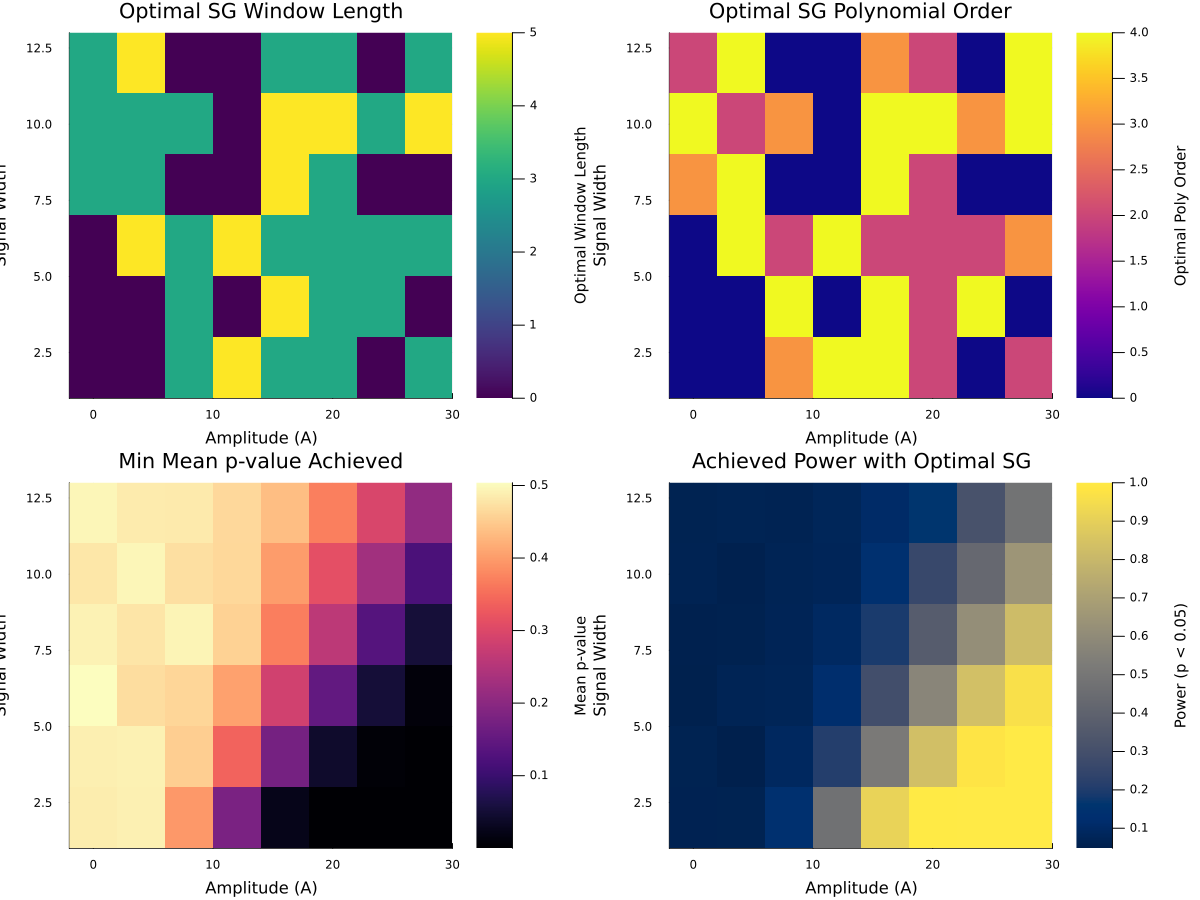

In [12]:
using DataFrames, Plots

# Pivot helper:
function pivot_heatmap(df, value_col)
    amplitudes = sort(unique(df.amplitude))
    widths = sort(unique(df.width))
    Z = zeros(length(widths), length(amplitudes))
    for (i, w) in enumerate(widths)
        for (j, a) in enumerate(amplitudes)
            Z[i, j] = df[(df.amplitude .== a) .& (df.width .== w), value_col][1]
        end
    end
    return amplitudes, widths, Z
end

# 1️⃣ Heatmap: Optimal Window Length
amps, widths, Z_wl = pivot_heatmap(optimal_df, :best_wl)
p_opt_wl = heatmap(
    amps, widths, Z_wl,
    xlabel = "Amplitude (A)", ylabel = "Signal Width",
    colorbar_title = "Optimal Window Length",
    title = "Optimal SG Window Length",
    c = :viridis
)

# 2️⃣ Heatmap: Optimal Polynomial Order
_, _, Z_po = pivot_heatmap(optimal_df, :best_po)
p_opt_po = heatmap(
    amps, widths, Z_po,
    xlabel = "Amplitude (A)", ylabel = "Signal Width",
    colorbar_title = "Optimal Poly Order",
    title = "Optimal SG Polynomial Order",
    c = :plasma
)

# 3️⃣ Heatmap: Min Mean p-value
_, _, Z_meanp = pivot_heatmap(optimal_df, :best_mean_p)
p_opt_meanp = heatmap(
    amps, widths, Z_meanp,
    xlabel = "Amplitude (A)", ylabel = "Signal Width",
    colorbar_title = "Mean p-value",
    title = "Min Mean p-value Achieved",
    c = :magma
)

# 4️⃣ Heatmap: Power
_, _, Z_power = pivot_heatmap(optimal_df, :best_power)
p_opt_power = heatmap(
    amps, widths, Z_power,
    xlabel = "Amplitude (A)", ylabel = "Signal Width",
    colorbar_title = "Power (p < 0.05)",
    title = "Achieved Power with Optimal SG",
    c = :cividis
)

# Display in a 2x2 grid
plot(p_opt_wl, p_opt_po, p_opt_meanp, p_opt_power, layout = (2, 2), size = (1200, 900))


In [ ]:
using Distributions
using Random
using Statistics
using PoissonRandom
using ArgCheck
using QuadGK
using RunStatistics
using RunStatistics: t_obs
using LinearAlgebra

#include("MADMAX-runs.ipynb")



# -----------------------------
# PARAMETERS
# -----------------------------
n_tests = 1000         # reduced for fast test, increase for final production
nbins = 10_000
epsp = 1e-7
test_amplitudes = [4,8,12,16,20]
test_widths = [2.0, 4.0, 6.0, 8.0, 10.0, 12.0]
sg_window_lengths = [3, 5, 7, 9, 11, 13]
sg_poly_orders = [2, 3, 4]
rebin_steps = [1, 2, 5, 10]

# Squares Statistic settings
Ns_dict = Dict{Int, Vector{Float64}}()
for step in rebin_steps
    n_bins_rebinned = Int(nbins / step)
    Ns_dict[step] = [50.0, n_bins_rebinned / 50]
end

# -----------------------------
# SAVITZKY-GOLAY FUNCTIONS
# -----------------------------
function savgol_coeffs(window_length, poly_order)
    if window_length % 2 != 1
        error("Window length must be odd")
    end
    half_window = div(window_length - 1, 2)
    A = zeros(window_length, poly_order + 1)
    for i in 1:window_length
        x = i - half_window - 1
        for j in 1:(poly_order + 1)
            A[i, j] = x^(j - 1)
        end
    end
    return pinv(A)[1, :]
end

function apply_savgol_filter(data, window_length, poly_order)
    if window_length >= length(data)
        return copy(data)
    end
    coeffs = savgol_coeffs(window_length, poly_order)
    half_window = div(window_length - 1, 2)
    filtered = zeros(length(data))
    for i in 1:length(data)
        start_idx = max(1, i - half_window)
        end_idx = min(length(data), i + half_window)
        if i <= half_window || i > length(data) - half_window
            filtered[i] = mean(data[start_idx:end_idx])
        else
            filtered[i] = sum(coeffs .* data[start_idx:end_idx])
        end
    end
    return filtered
end

# -----------------------------
# SIGNAL GENERATOR
# -----------------------------
function signal_integral(x1, x2, A, w, ::Symbol)
    ds = Normal(0.0, w)
    A * (cdf(ds, x2) - cdf(ds, x1))
end

# -----------------------------
# MAIN SCAN
# -----------------------------
results = Dict()
Random.seed!(42)
println("Starting SG Filter Width Scan with rebinning...")

t_start = time()
for width in test_widths
    results[width] = Dict()
    for amplitude in test_amplitudes
        key = "A$(amplitude)"
        results[width][key] = Dict()

        for step in rebin_steps
            println("\nWidth = $width, Amplitude = $amplitude, Rebin step = $step")
            nbins_rebinned = Int(nbins / step)
            pv_original = zeros(n_tests)
            Ns_current = Ns_dict[step]

            for test in 1:n_tests
                Run = zeros(nbins)
                if amplitude == 0
                    Run .= randn(nbins)
                else
                    for bin in 1:nbins
                        x1 = (bin - 1) - nbins / 2
                        x2 = bin - nbins / 2
                        bin_integral = signal_integral(x1, x2, amplitude, width, :gaussian)
                        d = Normal(bin_integral, 1.0)
                        Run[bin] = rand(d)
                    end
                end

                # Rebin
                if step > 1
                    Run_rebinned = [sum(@view Run[(i-1)*step+1:i*step]) for i in 1:nbins_rebinned]
                else
                    Run_rebinned = Run
                end

                Squares = t_obs(Run_rebinned, 0.0, step)
                pv_original[test] = squares_pvalue_approx(Squares[1], Ns_current, epsp)

                if test % 200 == 0
                    println("  Completed $test / $n_tests (original)")
                end
            end

            results[width][key]["original_rebin_$step"] = pv_original
            println("  Original complete: Mean p = $(round(mean(pv_original), digits=4)), Power = $(round(mean(pv_original .< 0.05), digits=4))")

            # -------------------
            # SG Filter
            # -------------------
            for wl in sg_window_lengths
                for po in sg_poly_orders
                    println("  Applying SG filter wl = $wl, po = $po, step = $step")
                    pv_filtered = zeros(n_tests)

                    for test in 1:n_tests
                        Run = zeros(nbins)
                        if amplitude == 0
                            Run .= randn(nbins)
                        else
                            for bin in 1:nbins
                                x1 = (bin - 1) - nbins / 2
                                x2 = bin - nbins / 2
                                bin_integral = signal_integral(x1, x2, amplitude, width, :gaussian)
                                d = Normal(bin_integral, 1.0)
                                Run[bin] = rand(d)
                            end
                        end

                        Run_filtered = apply_savgol_filter(Run, wl, po)

                        # Rebin filtered
                        if step > 1
                            Run_rebinned = [sum(@view Run_filtered[(i-1)*step+1:i*step]) for i in 1:nbins_rebinned]
                        else
                            Run_rebinned = Run_filtered
                        end

                        Squares = t_obs(Run_rebinned, 0.0, step)
                        pv_filtered[test] = squares_pvalue_approx(Squares[1], Ns_current, epsp)

                        if test % 200 == 0
                            println("    Completed $test / $n_tests (SG wl = $wl, po = $po)")
                        end
                    end
                    results[width][key]["sg_$(wl)_$(po)_rebin_$step"] = pv_filtered
                    println("   SG wl = $wl, po = $po, step = $step complete: Mean p = $(round(mean(pv_filtered), digits=4)), Power = $(round(mean(pv_filtered .< 0.05), digits=4))")
                end
            end
        end
        println("\n✅ Width = $width, A = $amplitude fully completed.")
    end
end

println("\nAll simulations completed in $(round((time() - t_start)/60, digits=2)) minutes.")
println("Generating optimal summary DataFrame...")

# -----------------------------
# GENERATE SUMMARY DATAFRAME
# -----------------------------
optimal_df = DataFrame(width=Float64[], amplitude=Int[], step=Int[], best_wl=Int[], best_po=Int[], best_mean_p=Float64[], best_power=Float64[])

for width in test_widths
    for amplitude in test_amplitudes
        key = "A$(amplitude)"
        for step in rebin_steps
            best_mean_p = mean(results[width][key]["original_rebin_$step"])
            best_power = mean(results[width][key]["original_rebin_$step"] .< 0.05)
            best_wl = 0
            best_po = 0

            for wl in sg_window_lengths
                for po in sg_poly_orders
                    pvs = results[width][key]["sg_$(wl)_$(po)_rebin_$step"]
                    mp = mean(pvs)
                    pow = mean(pvs .< 0.05)
                    if mp < best_mean_p
                        best_mean_p = mp
                        best_power = pow
                        best_wl = wl
                        best_po = po
                    end
                end
            end

            push!(optimal_df, (width, amplitude, step, best_wl, best_po, best_mean_p, best_power))
        end
    end
end

display(optimal_df)

println("\n✅ Optimal SG filter with rebinning analysis completed.")

# -----------------------------
# (Optional) Save outputs
# -----------------------------
# using CSV
# CSV.write("optimal_sg_summary.csv", optimal_df)
# using Serialization
# serialize("sg_results.jls", results)



Starting SG Filter Width Scan with rebinning...

Width = 2.0, Amplitude = 4, Rebin step = 1
  Completed 200 / 1000 (original)
  Completed 400 / 1000 (original)
  Completed 600 / 1000 (original)
  Completed 800 / 1000 (original)
  Completed 1000 / 1000 (original)
  Original complete: Mean p = 0.4934, Power = 0.055
  Applying SG filter wl = 3, po = 2, step = 1
    Completed 200 / 1000 (SG wl = 3, po = 2)
    Completed 400 / 1000 (SG wl = 3, po = 2)
    Completed 600 / 1000 (SG wl = 3, po = 2)
    Completed 800 / 1000 (SG wl = 3, po = 2)
    Completed 1000 / 1000 (SG wl = 3, po = 2)
   SG wl = 3, po = 2, step = 1 complete: Mean p = 0.4947, Power = 0.059
  Applying SG filter wl = 3, po = 3, step = 1
    Completed 200 / 1000 (SG wl = 3, po = 3)
    Completed 400 / 1000 (SG wl = 3, po = 3)
    Completed 600 / 1000 (SG wl = 3, po = 3)
    Completed 800 / 1000 (SG wl = 3, po = 3)
    Completed 1000 / 1000 (SG wl = 3, po = 3)
   SG wl = 3, po = 3, step = 1 complete: Mean p = 0.4874, Power = 0.0